<a href="https://colab.research.google.com/github/Harshith-VC/Telecom-Customer-Churn/blob/main/Telecom_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/Customer Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Check for missing values in the dataset

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Generate summary statistics for numerical columns

In [ ]:
numerical_summary = df.describe()

numerical_summary


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


1. **SeniorCitizen**:
   - Mean: 0.16 (16% of customers are senior citizens)
   
2. **Tenure** (months):
   - Average customer tenure: ~32 months
   - Minimum tenure: 0 months (new customers)
   - Maximum tenure: 72 months

3. **MonthlyCharges**:
   - Average monthly charges: $64.76
   - Minimum charges: $18.25
   - Maximum charges: $118.75

#Customer Churn Distribution

In [ ]:
import plotly.express as px

# Plot the distribution of Churn
churn_distribution = df['Churn'].value_counts()

# Create a pie chart to visualize the Churn distribution
fig = px.pie(names=churn_distribution.index, values=churn_distribution.values,
             title='Customer Churn Distribution',
             labels={'index': 'Churn', 'value': 'Count'})

fig.show()


#Check Correlations between differrent columns

In [ ]:
# Convert TotalCharges to numeric, as it may have some issues due to spaces or non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Checking correlation between numerical features and churn
# First, I'll map the 'Churn' column to 1 (Yes) and 0 (No) for correlation purposes
df['Churn_mapped'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Checking correlations
correlation_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_mapped']].corr()

correlation_matrix


,tenure,MonthlyCharges,TotalCharges,Churn_mapped
tenure,1.000000,0.247900,0.825880,-0.352229
MonthlyCharges,0.247900,1.000000,0.651065,0.193356
TotalCharges,0.825880,0.651065,1.000000,-0.199484
Churn_mapped,-0.352229,0.193356,-0.199484,1.000000


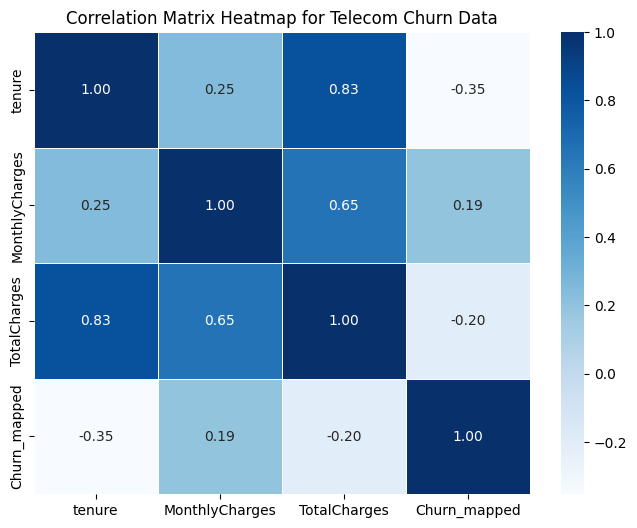

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Telecom Churn Data')
plt.show()



The correlation matrix has following relationships:

1. **Tenure and Churn**: There is a negative correlation (-0.35) between tenure and churn, indicating that customers with longer tenure are less likely to churn.

2. **MonthlyCharges and Churn**: There is a slight positive correlation (0.19) between monthly charges and churn, suggesting that customers with higher monthly charges are more likely to churn.

3. **TotalCharges and Churn**: There is a weak negative correlation (-0.20) between total charges and churn, meaning customers who have paid more overall tend to churn less.



# Monthly Charges by Contract type

In [ ]:
fig = px.box(df, x='Contract', y='MonthlyCharges',
             title='Monthly Charges Distribution by Contract Type',
             labels={'Contract': 'Contract Type', 'MonthlyCharges': 'Monthly Charges'},
             points="all")

fig.show()


- **Month-to-month contracts** tend to have a wider range of monthly charges, with some higher outliers.
- **One-year and two-year contracts** generally have more stable and lower monthly charges.

This suggests that customers on short-term contracts (month-to-month) might be paying more compared to those with longer contracts, which could be a factor contributing to churn.



# Plot Churn distribution by Payment Method using a count plot

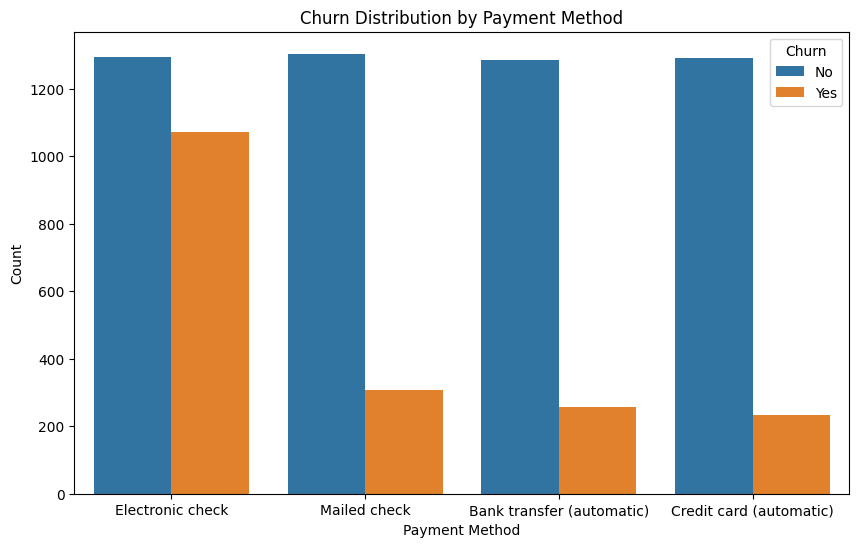

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

- Customers who use **Electronic Check** seem to have a higher churn rate compared to other payment methods.
- Customers using **Bank Transfer**, **Credit Card**, or **Mailed Check** have lower churn rates, indicating they are more likely to stay.

This insight suggests that customers who prefer electronic checks might be less satisfied, and further investigation into their behavior could provide actionable insights.


# Distribution of tenure for churned customers

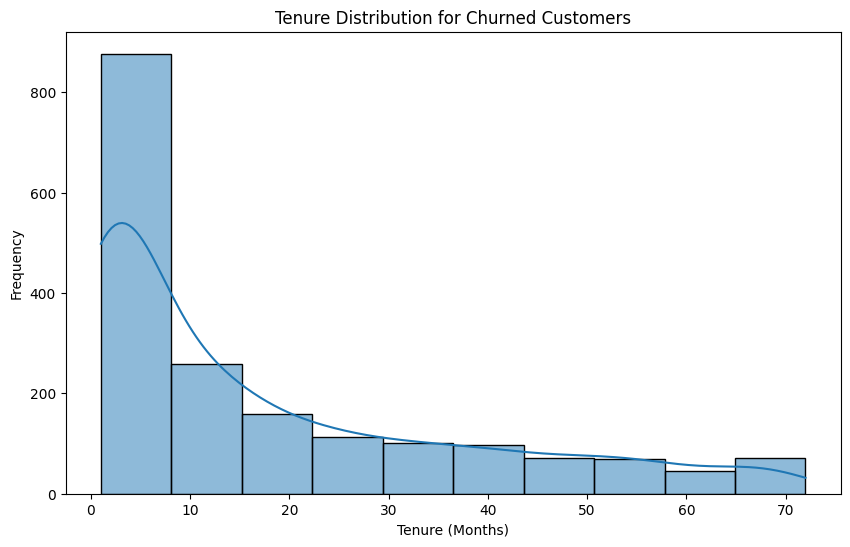

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Churn'] == 'Yes'], x='tenure', bins=10, kde=True)
plt.title('Tenure Distribution for Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

# Churn rates by gender

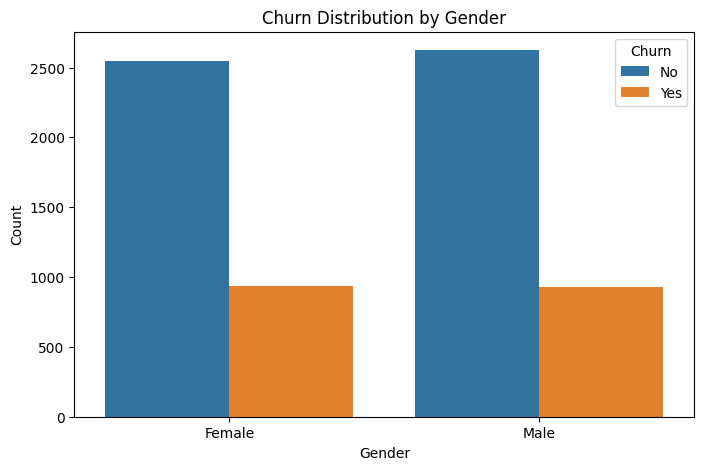

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


- Both males and females have a fairly similar churn rate, with no significant difference between the two groups.
- This suggests that gender does not appear to be a major factor in customer churn in this dataset.

# Churn distribution for Senior Citizens

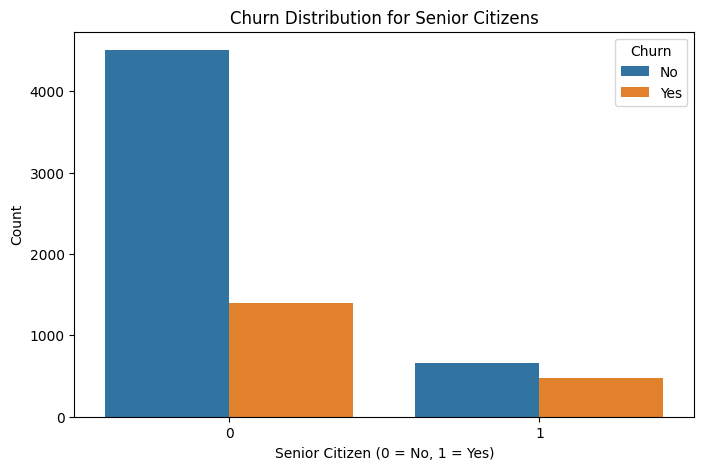

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Churn Distribution for Senior Citizens')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
df.pivot_table(index='gender', columns='SeniorCitizen', values='tenure', aggfunc='mean')

SeniorCitizen,0,1
gender,,
Female,32.171233,32.621479
Male,32.212680,33.963415


- **Senior citizens (1)** have a higher proportion of churn compared to non-senior citizens (0).
- This suggests that senior citizens are more likely to leave the service than younger customers.

# Churn rates by Internet Service type

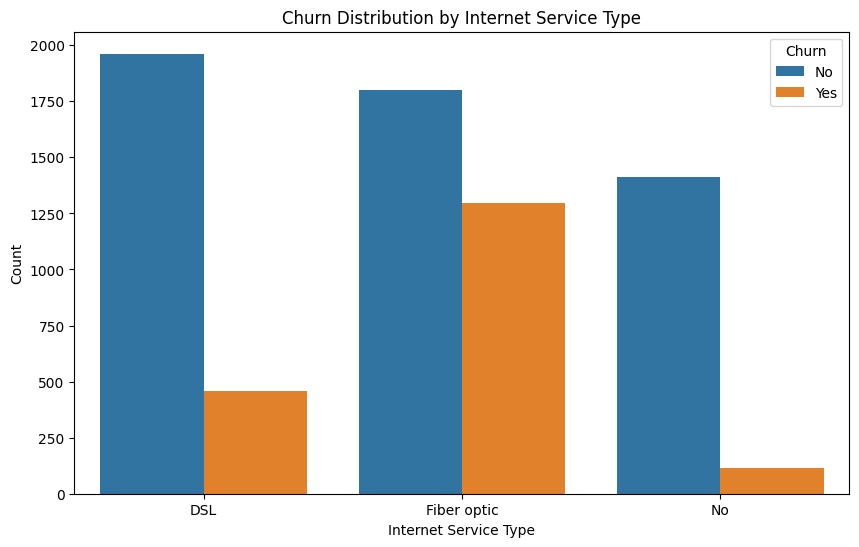

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn Distribution by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()

- **Fiber optic** customers have the highest churn rate compared to those using **DSL** or **no internet service**.
- Customers with **DSL** tend to churn less, and those without internet service have the lowest churn rate.

This suggests that fiber optic customers may face issues that cause them to leave at a higher rate, potentially related to price, service quality, or competition.

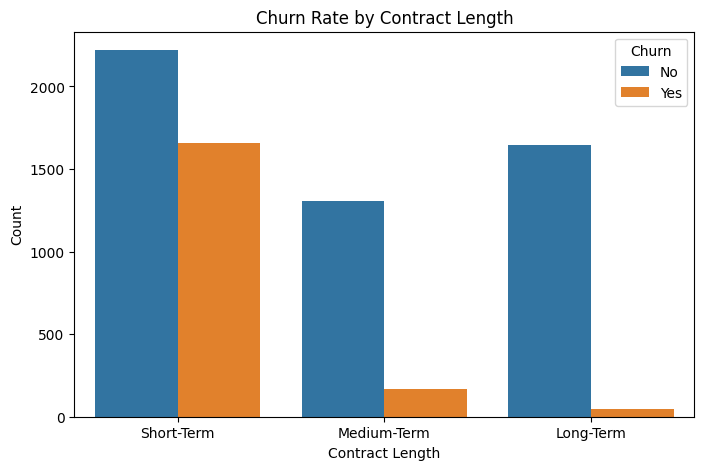

In [ ]:
# Creating a new column to categorize contract lengths
contract_length_mapping = {
    'Month-to-month': 'Short-Term',
    'One year': 'Medium-Term',
    'Two year': 'Long-Term'
}

df['ContractLength'] = df['Contract'].map(contract_length_mapping)

# Plotting churn rate by contract length
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='ContractLength', hue='Churn')
plt.title('Churn Rate by Contract Length')
plt.xlabel('Contract Length')
plt.ylabel('Count')
plt.show()


- **Short-term (Month-to-month)** contracts have the highest churn rate.
- **Medium-term (One-year)** and **long-term (Two-year)** contracts have significantly lower churn rates, indicating that customers with longer commitments are more likely to stay.

This suggests that offering incentives for longer contracts could help reduce churn.

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_mapped,ContractLength
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,Short-Term
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,Medium-Term
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Short-Term
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,Medium-Term
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Short-Term


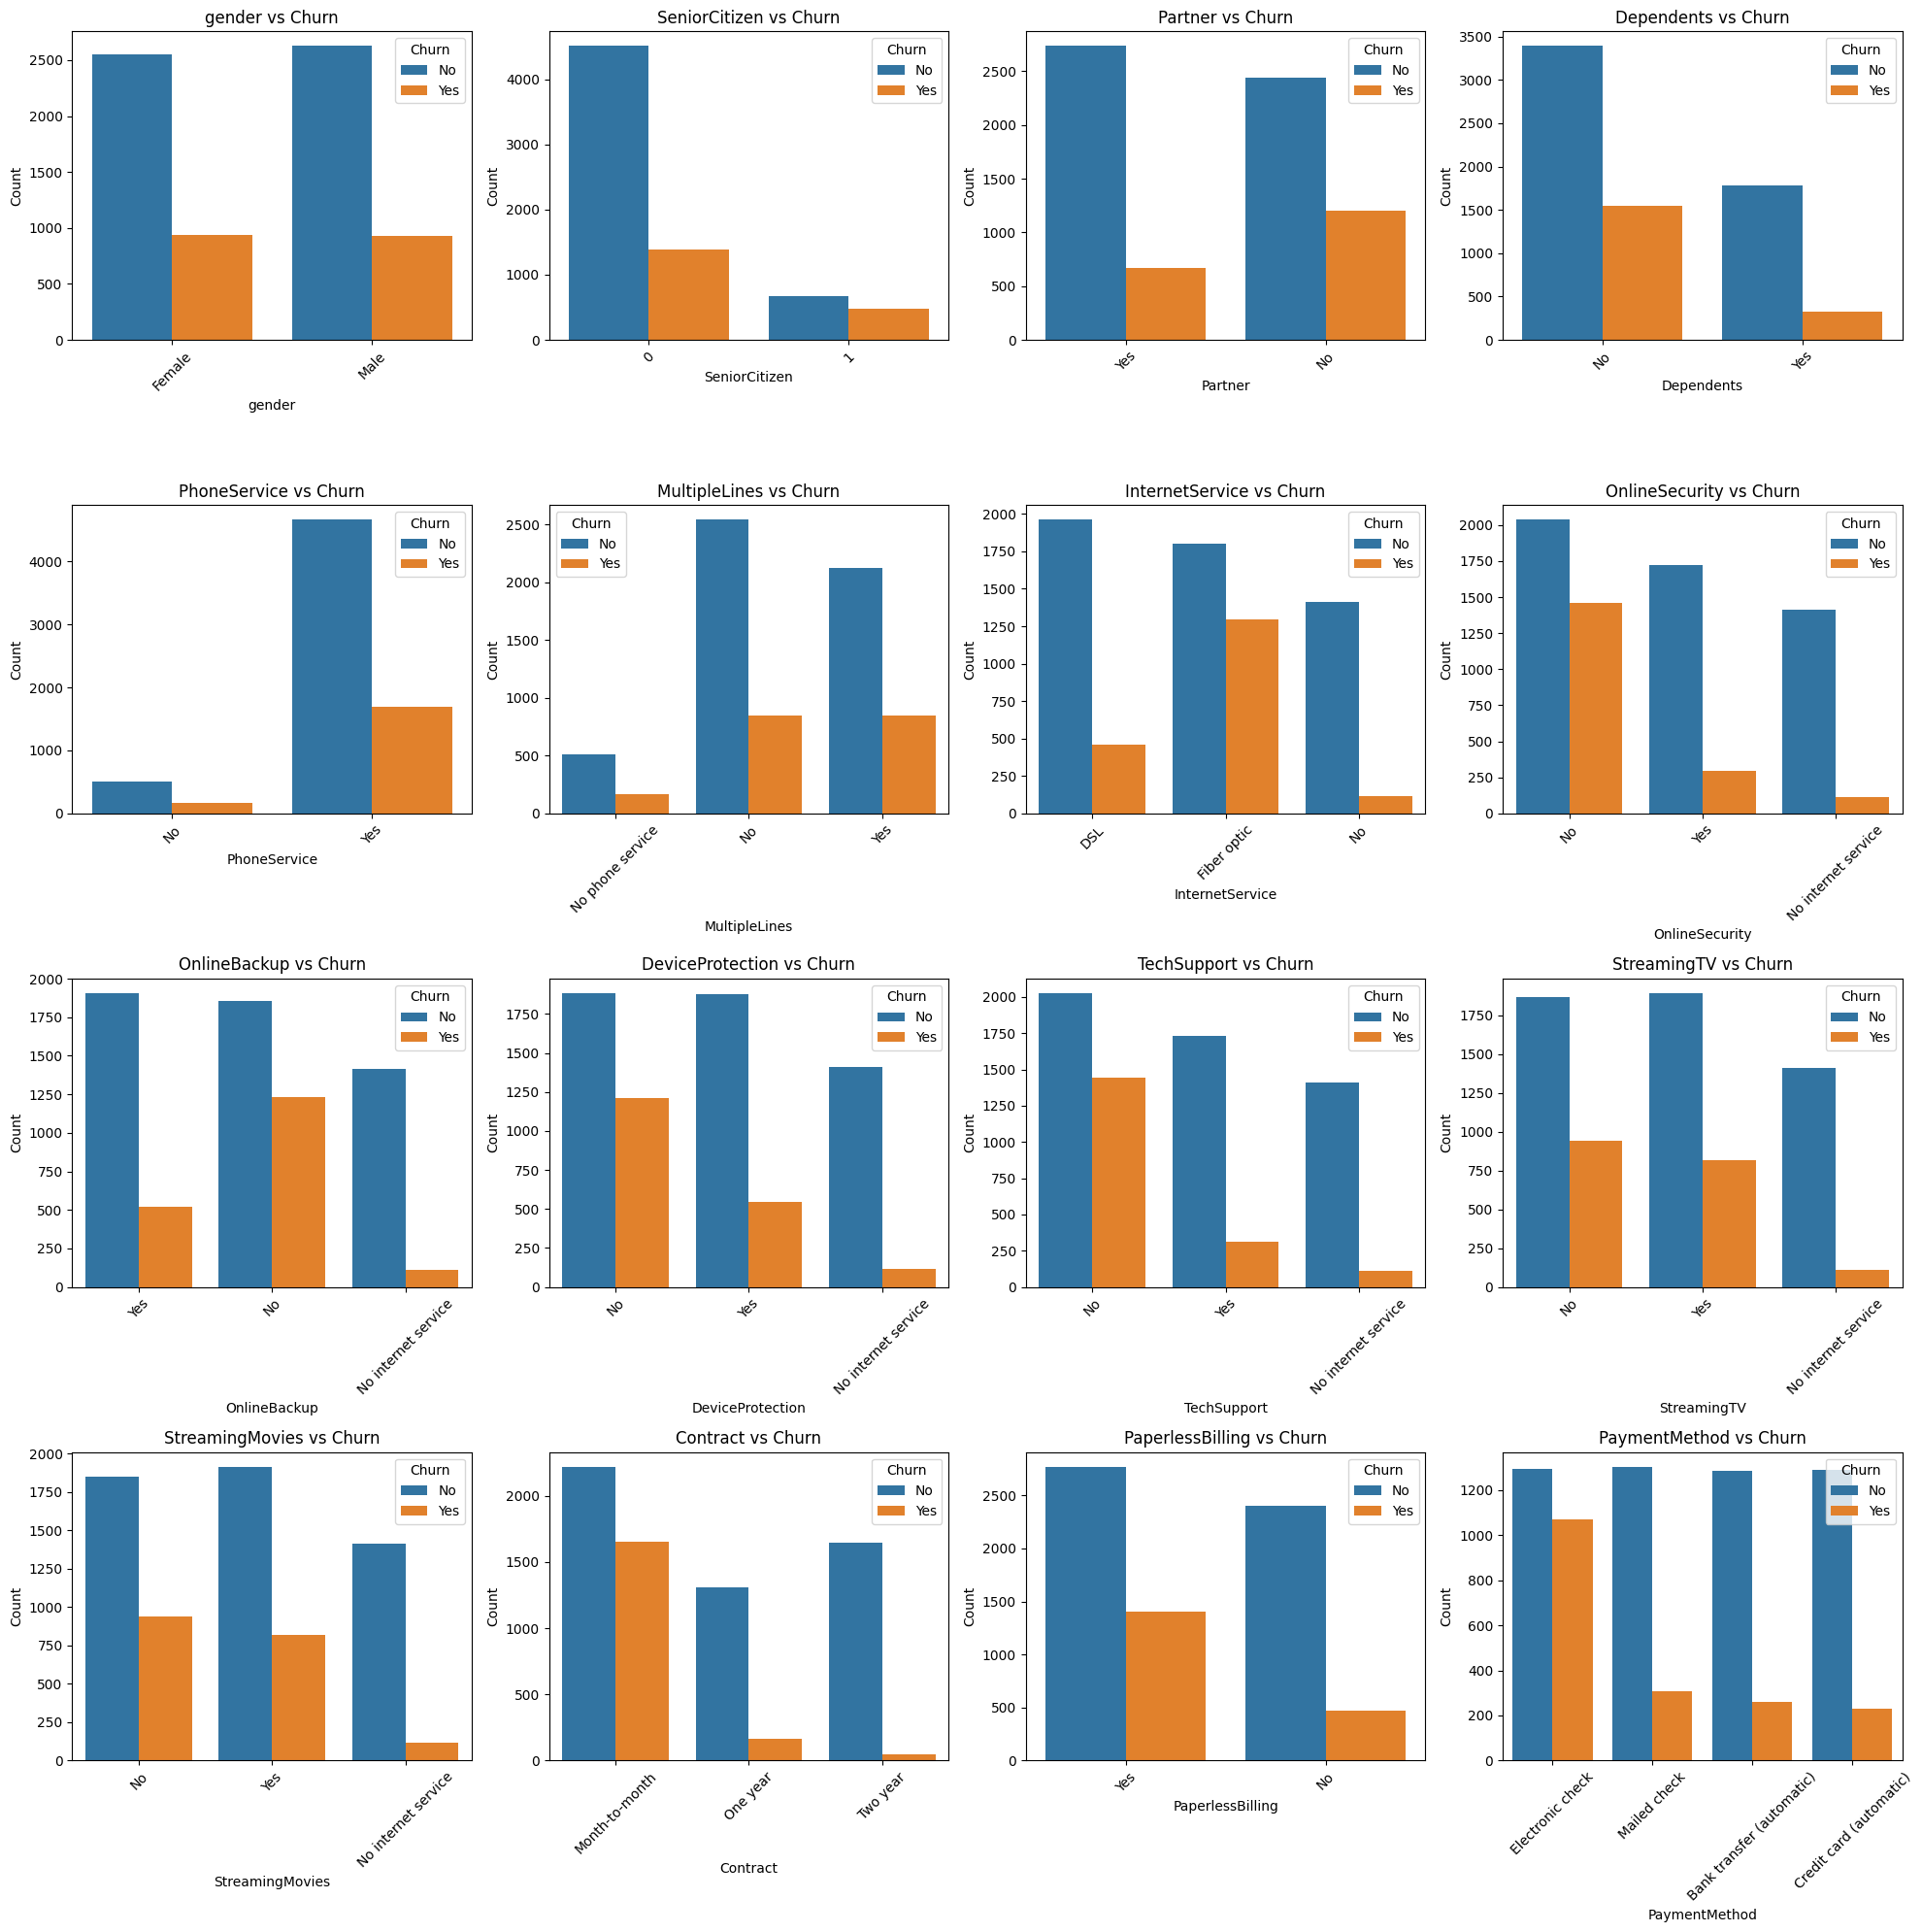

In [ ]:
# Creating subplots with count plots for all categorical columns related to churn
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Creating count plots for each categorical column
for i, column in enumerate(categorical_columns):
    row = i // 4
    col = i % 4
    sns.countplot(data=df, x=column, hue='Churn', ax=axes[row, col])
    axes[row, col].set_title(f'{column} vs Churn')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Define categorical columns
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create subplots
fig = make_subplots(rows=4, cols=4, subplot_titles=categorical_columns)

# Add a bar plot for each categorical column
for i, column in enumerate(categorical_columns):
    churn_counts = df.groupby([column, 'Churn']).size().reset_index(name='counts')
    for churn in ['Yes', 'No']:
        filtered_data = churn_counts[churn_counts['Churn'] == churn]
        row = (i // 4) + 1
        col = (i % 4) + 1
        fig.add_trace(go.Bar(x=filtered_data[column], y=filtered_data['counts'], name=f'{churn} - {column}',
                             showlegend=(i == 0)), row=row, col=col)

# Update layout
fig.update_layout(height=1200, width=1400, title_text="Churn Count Plots by Categorical Features")
fig.show()


# Recommendations:

- **Promote Long-Term Contracts:** Offer incentives for customers to commit to longer contracts to reduce churn.

- **Address Payment Method Concerns:** Implement campaigns encouraging customers
to switch from electronic checks to more reliable payment methods

- **Customer Engagement in Early Tenure** Focus on improving the customer experience within the first year, as churn is highest in this period.

- **Special Senior Citizen Retention Programs:** Create personalized offers or assistance programs to retain the senior demographic.